# Hypothesis Testing For Data Science

## Inferential Statistics 
In this unit, we will cover a few hypothesis tests that can be used to make inferences about population(s). 

We’ll cover ways of implementing these hypothesis tests in Python and simulate some hypothesis tests without pre-built functions.

Some methods that are used in inferential statistics include hypothesis testing and regression.

## 1. One Sample T Test in SciPy
### What is hypothesis testing?
Hypothesis Testing is a framework for asking questions about a dataset and answering them with probabilistic statements. There are many different kinds of hypothesis tests that can be used to address different kinds of questions and data. In this article, we’ll walk through a simulation of a one sample t- test in order to build intuition about how many different kinds of hypothesis tests work!

Before you use hypothesis tests in practice, it is important to remember the following:

- A p-value is a probability, usually reported as a decimal between zero and one.


- A small p-value means that an observed sample statistic (or something more extreme) would be unlikely to occur if the null hypothesis is true.


- A significance threshold can be used to translate a p-value into a “significant” or “non-significant” result.


- In practice, the alternative hypothesis and significance threshold should be chosen prior to data collection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Example
As an example, let’s imagine the fictional business BuyPie, which sends ingredients for pies to your household so that you can make them from scratch. Suppose that a product manager wants online BuyPie orders to cost around 1000 Rupees on average. In the past day, 50 people made an online purchase and the average payment per order was less than 1000 Rupees. Are people really spending less than 1000 Rupees on average? Or is this the result of chance and a small sample size?

In [2]:
prices = np.genfromtxt("prices.csv")
prices

array([ 978., 1080.,  999.,  855., 1105.,  961.,  899., 1061.,  880.,
       1455.,  505.,  936., 1024.,  982.,  840.,  930.,  829.,  504.,
        955., 1380., 1361., 1130.,  946.,  973., 1076., 1131.,  810.,
        734., 1275.,  867.,  962.,  865.,  709., 1216.,  735.,  768.,
        757., 1060.,  715.,  839.,  999., 1259., 1194., 1082., 1129.,
       1255.,  931., 1236.,  921.,  907.])

In [3]:
prices_mean = prices.mean()
prices_mean

980.0

In [4]:
# Null : The average cost of BuyPie order is 1000 Rupees.
# Alternative : The average cost of a BuyPie order is not 1000 Rupees.

In [5]:
from scipy.stats import ttest_1samp

In [6]:
tstat, pval = ttest_1samp(prices, 1000)
pval

0.4920744804182786

**P-values are probabilities, so they should be between 0 and 1. This p-value is the probability of observing an average purchase price less than 980 OR more than 1020 among a sample of 50 purchases.**

### Assumptions of a One Sample T-Test
- The sample was randomly selected from popoulation
    - For example, if you only collect data for site visitors who agree to share their personal information, this subset of visitors was not randomly selected and may differ from the larger population
  
  
- The individual observations were independent
    - For example, if one visitor to BuyPie loves the apple pie they bought so much that they convinced their friend to buy one too, those observations were not independent.
    
- The data is normally distributed without outliers OR the sample size is large (enough)
    - There are no set rules on what a “large enough” sample size is, but a common threshold is around 40. For sample sizes smaller than 40, and really all samples in general, it’s a good idea to make sure to plot a histogram of your data and check for outliers, multi-modal distributions (with multiple humps), or skewed distributions. If you see any of those things for a small sample, a t-test is probably not appropriate.
    
In general, if you run an experiment that violates (or possibly violates) one of these assumptions, you can still run the test and report the results — but you should also report assumptions that were not met and acknowledge that the test results could be flawed.

In [7]:
len(prices)

50

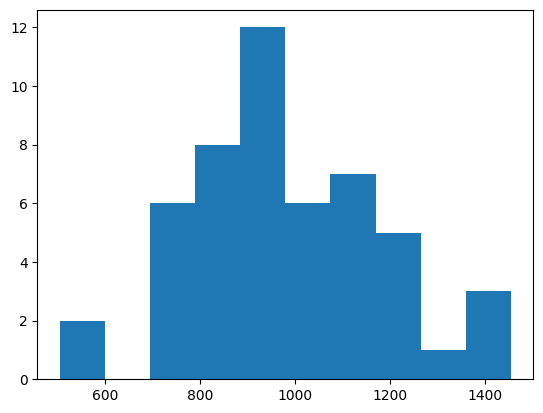

In [8]:
plt.hist(prices)
plt.show()

In [9]:
#There does not seem to be any clear skewness, bi-modality, or outliers. The histogram is approximately normal.

### Review
- One-sample t-tests are used for comparing a sample mean to an expected population mean.

- A one-sample t-test can be implemented in Python using the SciPy ``ttest_1samp()`` function.

- Assumptions of a one-sample t-test include:
    - The sample was randomly drawn from the population of interest
    - The observations in the sample are independent
    - The sample size is large “enough” or the sample data is normally distributed

### Final Exercise
To practice running a one-sample t-test and inspecting the resulting p-value, try the following:

1. Calculate and print out a p-value for day 1 where the null hypothesis is that the average purchase price was 1000 Rupees and the alternative hypothesis is that the average purchase price was not 1000 Rupees. Print out the p-value.


2. Run the same hypothesis tests for days 1-10 (the fastest way to do this is with a for-loop!) and print out the resulting p-values. What’s the smallest p-value you observe for those 10 days?


3. Try changing the null hypothesis so that the expected population mean that you’re testing against is different from 1000. Try any numbers that you want. How do your p-values change?

In [10]:
daily_prices = np.genfromtxt("daily_prices.csv", delimiter=",")
daily_prices

array([[1353.,  760.,  900., ...,  998., 1078., 1104.],
       [ 831.,  993.,  922., ..., 1149., 1068., 1158.],
       [1115.,  908., 1005., ...,  748., 1322., 1205.],
       ...,
       [1157.,  841., 1321., ..., 1053.,  948., 1164.],
       [ 843., 1238., 1129., ...,  442.,  862., 1228.],
       [ 765., 1406.,  820., ...,  925., 1509., 1054.]])

In [11]:
# Null : The average purchase price is 1000 Rupee.
# Alternative : The average purchase price is not 1000 Rupee.

In [12]:
len(daily_prices)

1000

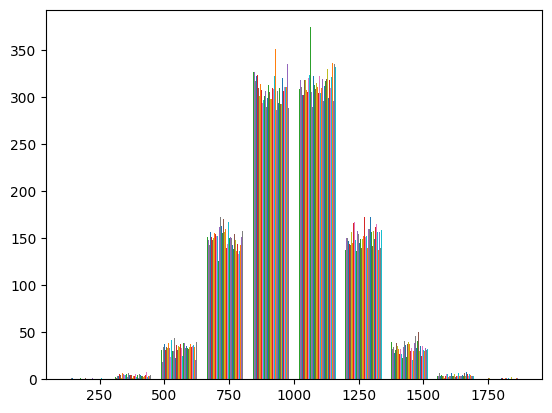

In [13]:
plt.hist(daily_prices)
plt.show()

#### Day-1

In [14]:
tstat, pval = ttest_1samp(daily_prices[0], 1000)
pval

0.6071186852381734

#### 10 Days 

In [15]:
for i in range(10):
    tstat, pval = ttest_1samp(daily_prices[i], 1000)
    print("day", i + 1, "p-value:")
    print(pval)

day 1 p-value:
0.6071186852381734
day 2 p-value:
0.4093623236367092
day 3 p-value:
0.6823152912621231
day 4 p-value:
0.9396281562313855
day 5 p-value:
0.8434532443692766
day 6 p-value:
0.018765443076610062
day 7 p-value:
0.6240646986588566
day 8 p-value:
0.8594296361029083
day 9 p-value:
0.774383958509746
day 10 p-value:
0.6813407662727201


### 10 Days with Different Hypothesis

In [16]:
print("day 1-10 with a different alternative hypothesis:")
for i in range(10):
    tstat, pval = ttest_1samp(daily_prices[i], 950)
    print("day",i+1, "p-value:")
    print(pval)

day 1-10 with a different alternative hypothesis:
day 1 p-value:
0.006068400953830715
day 2 p-value:
0.00248388684038805
day 3 p-value:
0.00576062384123009
day 4 p-value:
0.02286083709081289
day 5 p-value:
0.02269727235522927
day 6 p-value:
3.729171844379401e-06
day 7 p-value:
0.007970863097214977
day 8 p-value:
0.05444296471985292
day 9 p-value:
0.022347610165122662
day 10 p-value:
0.07949349326248725


## 2. Simulating a Binomial Test
- Binomial tests are useful for comparing the frequency of some outcome in a sample to the expected probability of that outcome. For example, if we expect 90% of ticketed passengers to show up for their flight but only 80 of 100 ticketed passengers actually show up, we could use a binomial test to understand whether 80 is significantly different from 90.


- Binomial tests are similar to one-sample t-tests in that they test a sample statistic against some population-level expectation. The difference is that:

    - Binomial tests are used for binary categorical data to compare a sample frequency to an expected population-level probability
    - One-sample t-tests are used for quantitative data to compare a sample mean to an expected population mean.
    
   

### Case
The next few exercises will walk through the process of using a binomial test to analyze data from a hypothetical online company, Live-it-LIVE.com — a website that sells all the necessary props and costumes to recreate iconic movie scenes at home!

In [18]:
monthly_report = pd.read_csv("monthly_report.csv")
monthly_report.head()

,timestamp,purchase,item
0,2020-01-17 17:23:06,y,cue cards - love actually
1,2020-01-25 17:09:39,n,NaN
2,2020-01-25 05:22:01,n,NaN
3,2020-01-18 04:33:40,y,t-rex - jurassic park
4,2020-01-24 17:24:52,n,NaN


The marketing department at Live-it-LIVE reports that, during this time of year, about 10% of visitors to Live-it-LIVE.com make a purchase.

The monthly report shows every visitor to the site and whether or not they made a purchase. The checkout page had a small bug this month, so the business department wants to know whether the purchase rate dipped below expectation. They’ve asked us to investigate this question.

### Summarizing the Sample
In order to run a hypothesis test to address this, we’ll first need to know two things from the data:

- The number of people who visited the website
- The number of people who made a purchase on the website

In [19]:
sample_size = len(monthly_report)
sample_size

500

In [22]:
num_purchased = len(monthly_report[monthly_report["purchase"] == "y"])
num_purchased

41

### Simulating Randomness
In the last exercise, we calculated that there were 500 site visitors to live-it-LIVE.com this month and 41 of them made a purchase. In comparison, if each of the 500 visitors had a 10% chance of making a purchase, we would expect around 50 of those visitors to buy something. Is 41 different enough from 50 that we should question whether this months’ site visitors really had a 10% chance of making a purchase?

In [55]:
one_visitor = np.random.choice(["y", "n"], size = 1, p = [0.1, 0.9])
one_visitor

array(['n'], dtype='<U1')

In [122]:
simulated_monthly_visitors = np.random.choice(["y", "n"], size = 500, p = [0.1, 0.9])
simulated_monthly_visitors

array(['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n',
       'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'y', 'y', 'y', 'n', 'n', 'y', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'y', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'y', 'n', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y',
       'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'y', 'y', 'n', 'n',
       'n', 'n', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n

### Simulating the Null Distribution I

In [77]:
num_purchased = len(simulated_monthly_visitors[simulated_monthly_visitors == "y"])
num_purchased

49

In [93]:
null_outcomes = []
for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_purchased = np.sum(simulated_monthly_visitors == "y")
    null_outcomes.append(num_purchased)

### Simulating the Null Distribution II

In [94]:
null_min = min(null_outcomes)
null_min

25

In [95]:
null_max = max(null_outcomes)
null_max

78

### Inspecting the Null Distribution

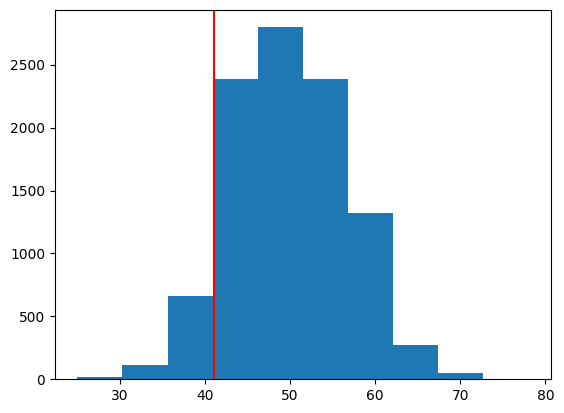

In [100]:
plt.hist(null_outcomes)
plt.axvline(41, color = "red");

### Confidence Intervals
By reporting an interval covering 90% of the values instead of the full range, we can say something like: “we are 90% confident that, if each visitor has a 10% chance of making a purchase, a random sample of 500 visitors will make between 37 and 63 purchases.” We can use the np.percentile() function to calculate this 95% interval as follows:

In [102]:
null_90CI = np.percentile(null_outcomes, [5, 95])
null_90CI

array([39., 61.])

### Calculating a One-Sided P-Value

In [109]:
# Null: the probability of a purchase was 10%
# Alternative: the probability of a purchase rate was LESS THAN 10%

null_outcomes = np.array(null_outcomes)
p_value = np.sum(null_outcomes <= 41) / len(null_outcomes)
p_value

0.1041

### Calculating a Two-Sided P-Value

In [110]:
# Null: the probability of a purchase was 10%.
# Alternative: the probability of a purchase rate was not 10%.

null_outcomes = np.array(null_outcomes)
p_value = np.sum((null_outcomes <= 41) | (null_outcomes >= 59)) / len(null_outcomes)
p_value

0.2061

### Writing a Binomial Test Function

In [115]:
def simulation_binomial_test(observed_successes, n, p):
  #initialize null_outcomes
    null_outcomes = []
  
  #generate the simulated null distribution
    for i in range(10000):
        simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
        num_purchased = np.sum(simulated_monthly_visitors == 'y')
        null_outcomes.append(num_purchased)

    #calculate a 1-sided p-value
    null_outcomes = np.array(null_outcomes)
    p_value = np.sum(null_outcomes <= 41)/len(null_outcomes) 
  
    #return the p-value
    return p_value

In [116]:
p_value1 = simulation_binomial_test(45, 500, .1)
p_value1

0.0999

### Binomial Testing with SciPy

In [118]:
from scipy.stats import binom_test
p_value2 = binom_test(45, 500, .1, alternative = 'less')
p_value2

0.254689260562342

In [119]:
p_value_2sided = binom_test(41, 500, 0.1)
p_value_2sided

0.2045639770068255

In [120]:
p_value_1sided = binom_test(41, 500, 0.1, alternative = "less")
p_value_1sided

0.10011352697567076

### Review
To summarize, here are some of the things you’ve learned about hypothesis tests in general:
- All hypothesis tests start with a null and alternative hypothesis.
- Outcomes of a hypothesis test that might be reported include:
    - Confidence intervals.
    - P-values
    
    
- A hypothesis test can be simulated by:
    - Taking repeated random samples where the null hypothesis is assumed to be true
    - Using those simulated samples to generate a null distribution
    - Comparing an observed sample statistic to that null distribution

## 3. Significance Thresholds
In order to turn a p-value, which is a probability, into a yes or no answer, data scientists often use a pre-set significance threshold. The significance threshold can be any number between 0 and 1, but a common choice is 0.05. P-values that are less than this threshold are considered “significant”, while larger p-values are considered “not significant”

### Error Types: 
    Null hypothesis:	                    is true	       is false
    P-value significant	                 Type I Error	  Correct!
    P-value not significant	             Correct!	      Type II error             

### Exercise

In [125]:
# Set the significance threshold equal to 0.05 and a counter for false positives equal to zero.
false_positives = 0
sig_threshold = 0.05

for i in range(1000): # Repeat these steps 1000 times
    
    # Simulate 100 learners, where each learner has 70% chance of answering a quiz question correctly.
    sim_sample = np.random.choice(["correct", "incorrect"], size = 100, p = [0.7, 0.3])
    
    # Calculate the number of simulated learners who answered the question correctly.
    num_correct = np.sum(sim_sample == "correct")
    
    # Run a binomial test for the simulated sample where the null hypothesis is that the probability of correct answer is 70%.
    p_val = binom_test(num_correct, 100, 0.7)
    
    # Add 1 to our false positives counter every time we make type 1 error.(the p-value is significant.)
    if p_val < sig_threshold:
        false_positives += 1

print(false_positives / 1000)
# Note that the proportion of false positive tests is very similar to the value of the significance threshold (0.05).

0.046


### Problems with Multiple Hypothesis Tests

While significance thresholds allow a data scientist to control the false positive rate for a single hypothesis test, this starts to break when performing multiple tests as part of a single study.

For example, suppose that we are writing a quiz at codecademy that is going to include 10 questions. For each question, we want to know whether the probability of a learner answering the question correctly is different from 70%. We now have to run 10 hypothesis tests, one for each question.

If the null hypothesis is true for every hypothesis test (the probability of a correct answer is 70% for every question) and we use a .05 significance level for each test, then:

- When we run a hypothesis test for a single question, we have a 95% chance of getting the right answer (a p-value > 0.05) — and a 5% chance of making a type I error.

- When we run hypothesis tests for two questions, we have only a 90% chance of getting the right answer for both hypothesis tests (.95*.95 = 0.90) — and a 10% chance of making at least one type I error.

- When we run hypothesis tests for all 10 questions, we have a 60% chance of getting the right answer for all ten hypothesis tests (0.95^10 = 0.60) — and a 40% chance of making at least one type I error.

To address this problem, it is important to plan research out ahead of time: decide what questions you want to address and figure out how many hypothesis tests you need to run. When running multiple tests, use a lower significance threshold (eg., 0.01) for each test to reduce the probability of making a type I error.
### Exercise

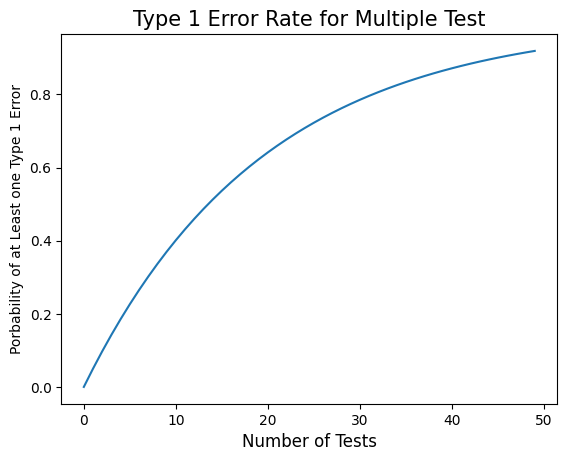

In [127]:
sig_threshold = 0.05
num_tests = np.array(range(50))
probabilities = 1- ((1-sig_threshold) ** num_tests)

plt.plot(num_tests, probabilities)
plt.title("Type 1 Error Rate for Multiple Test", fontsize = 15)
plt.ylabel("Porbability of at Least one Type 1 Error")
plt.xlabel("Number of Tests", fontsize = 12)
plt.show()

# Inspect your new plot. Now how many tests would lead to a probability of a type I error of 50%?
    # Approximately 15.